In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\loqma\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\loqma\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

# Load data into dataframe

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

In [5]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

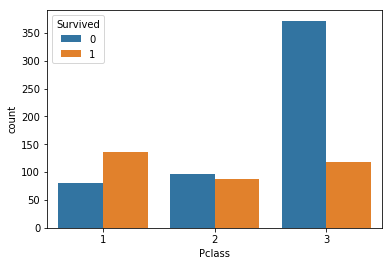

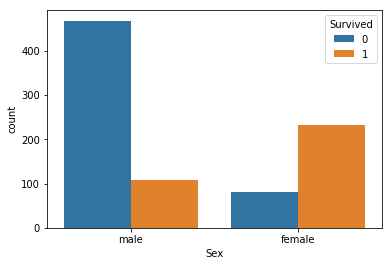

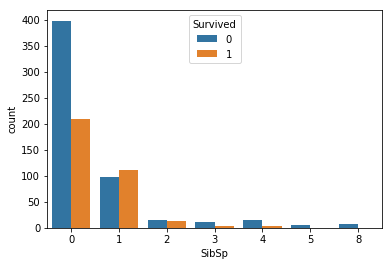

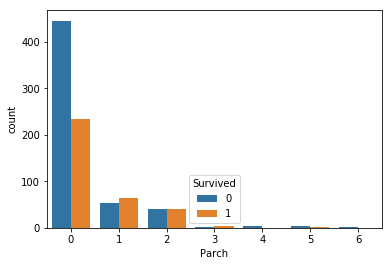

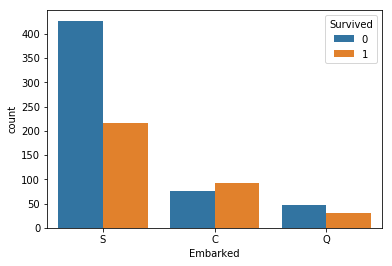

In [6]:
for feature in features:
    plt.figure()
    sns.countplot(train[feature], hue=train.Survived)

From the figure above,
1. There are a lot of victims from 3rd class socio-economic status
2. More male victims compared to female
3. Victims usually comes single without family members
4. Majority of victims embarked from Southampton

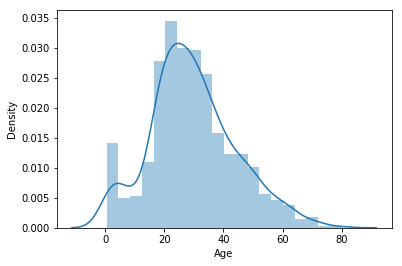

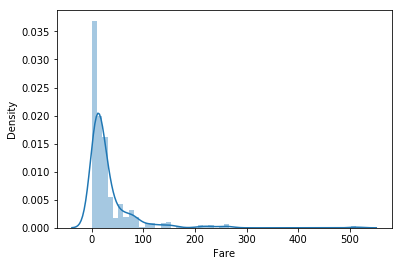

In [7]:
num_features = ['Age','Fare']
for feature in num_features:
    plt.figure()
    sns.distplot(train[feature])

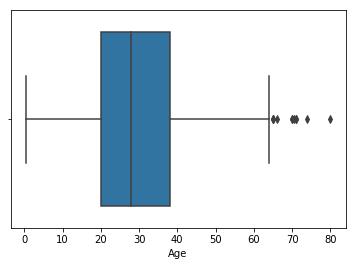

In [8]:
sns.boxplot(train['Age'])

In [9]:
train.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [10]:
train.loc[(train['Age'] < 10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [11]:
train.loc[(train['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


There is people board with 0 passenger fare. This can be the passenger able to board for free. However, we unable to correlate if the passenger boards for free has higher status or baby. This also can be the data is just simply missing. We keep the data as it is for now

# Filling missing data

We use median for age and mode for embarked

In [12]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Data Transform
We combine train and test dataset for data transform to maintain the format and number of feature

In [18]:
combine_df = pd.concat([train, test])

In [19]:
# drop id and name features because we dont how the Id is taken, no pattern
combine_df = combine_df.drop(['PassengerId','Name','Ticket'], axis=1)

We combine SibSp and Parch to simply show how many family member a person brings

In [20]:
combine_df['Family_mem'] = combine_df.Parch + combine_df.SibSp

In [21]:
combine_df = combine_df.drop(['Parch', 'SibSp'], axis=1)

In [22]:
combine_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_mem
0,0.0,3,male,22.0,7.2500,NaN,S,1
1,1.0,1,female,38.0,71.2833,C85,C,1
2,1.0,3,female,26.0,7.9250,NaN,S,0
3,1.0,1,female,35.0,53.1000,C123,S,1
4,0.0,3,male,35.0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...
413,NaN,3,male,27.0,8.0500,NaN,S,0
414,NaN,1,female,39.0,108.9000,C105,C,0
415,NaN,3,male,38.5,7.2500,NaN,S,0
416,NaN,3,male,27.0,8.0500,NaN,S,0


We use dummy variable for these features
1. one hot encoding for sex, embarked
2. binary for cabin (has_cabin)

In [23]:
sex = pd.get_dummies(combine_df['Sex'], drop_first=True)
combine_df = pd.concat([combine_df.drop('Sex', axis=1), sex], axis=1)

In [24]:
embarked = pd.get_dummies(combine_df['Embarked'], drop_first=False)
combine_df = pd.concat([combine_df.drop('Embarked', axis=1), embarked], axis=1)

In [25]:
combine_df

,Survived,Pclass,Age,Fare,Cabin,Family_mem,male,C,Q,S
0,0.0,3,22.0,7.2500,NaN,1,1,0,0,1
1,1.0,1,38.0,71.2833,C85,1,0,1,0,0
2,1.0,3,26.0,7.9250,NaN,0,0,0,0,1
3,1.0,1,35.0,53.1000,C123,1,0,0,0,1
4,0.0,3,35.0,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,27.0,8.0500,NaN,0,1,0,0,1
414,NaN,1,39.0,108.9000,C105,0,0,1,0,0
415,NaN,3,38.5,7.2500,NaN,0,1,0,0,1
416,NaN,3,27.0,8.0500,NaN,0,1,0,0,1


In [26]:
combine_df = combine_df.drop('Cabin', axis=1)

In [27]:
#combine_df['Fare'] = np.log1p(combine_df['Fare'].values)

In [28]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   Fare        1309 non-null   float64
 4   Family_mem  1309 non-null   int64  
 5   male        1309 non-null   uint8  
 6   C           1309 non-null   uint8  
 7   Q           1309 non-null   uint8  
 8   S           1309 non-null   uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 66.5 KB


Separate the dataframe back to train and test

In [29]:
train_dum = combine_df.iloc[:891,:]
test_dum = combine_df.iloc[891:,:]

In [30]:
test_dum = test_dum.drop('Survived', axis=1)

In [31]:
X = train_dum.drop('Survived', axis=1)
y = train_dum['Survived']

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Scaling the data using standard scaler

In [33]:
scaler = StandardScaler()

# generalise the model
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_dum = scaler.transform(test_dum)

# Machine Learning

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import os
import tempfile
import datetime

In [44]:
# ANN
# Instantiate modelA
modelA = keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
        
  ])

# Compile modelA
modelA.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

# Prepare training modelA log storage
logdirA = os.path.join("logs","modelA", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackA = tf.keras.callbacks.TensorBoard(logdirA, histogram_freq=1)


# Train modelA
historyA = modelA.fit(X_train, y_train,
                    epochs=200, 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/8 [==>...........................] - ETA: 1s - loss: 0.6866 - accuracy: 0.6300WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001CB39C59BF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

Epoch 46/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4215 - accuracy: 0.8174 - val_loss: 0.4290 - val_accuracy: 0.8156
Epoch 47/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4203 - accuracy: 0.8160 - val_loss: 0.4291 - val_accuracy: 0.8156
Epoch 48/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4195 - accuracy: 0.8118 - val_loss: 0.4285 - val_accuracy: 0.8156
Epoch 49/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8132 - val_loss: 0.4282 - val_accuracy: 0.8156
Epoch 50/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.8132 - val_loss: 0.4262 - val_accuracy: 0.8212
Epoch 51/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8174 - val_loss: 0.4264 - val_accuracy: 0.8156
Epoch 52/200
8/8 [==============================] - 0s 6ms/step - loss: 0.4150 - accuracy: 0.8216 - val_loss: 0.4247 - val_accuracy: 0.8156
Epoch 53/200
8/8 [==

8/8 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.8301 - val_loss: 0.4174 - val_accuracy: 0.8156
Epoch 105/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3938 - accuracy: 0.8272 - val_loss: 0.4186 - val_accuracy: 0.8156
Epoch 106/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.8287 - val_loss: 0.4198 - val_accuracy: 0.8101
Epoch 107/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3939 - accuracy: 0.8272 - val_loss: 0.4193 - val_accuracy: 0.8156
Epoch 108/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3938 - accuracy: 0.8287 - val_loss: 0.4180 - val_accuracy: 0.8212
Epoch 109/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.8301 - val_loss: 0.4174 - val_accuracy: 0.8212
Epoch 110/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3929 - accuracy: 0.8287 - val_loss: 0.4177 - val_accuracy: 0.8212
Epoch 111/200
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3859 - accuracy: 0.8329 - val_loss: 0.4151 - val_accuracy: 0.8268
Epoch 163/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3857 - accuracy: 0.8343 - val_loss: 0.4156 - val_accuracy: 0.8212
Epoch 164/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3858 - accuracy: 0.8357 - val_loss: 0.4159 - val_accuracy: 0.8212
Epoch 165/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8357 - val_loss: 0.4133 - val_accuracy: 0.8268
Epoch 166/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.8357 - val_loss: 0.4122 - val_accuracy: 0.8268
Epoch 167/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8357 - val_loss: 0.4123 - val_accuracy: 0.8268
Epoch 168/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.8371 - val_loss: 0.4114 - val_accuracy: 0.8268
Epoch 169/200
8/8 [========

In [45]:
best_model = modelA

In [46]:
y_pred = best_model.predict(test_dum) > 0.5

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 0s 695us/step


In [47]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [48]:
pred=pd.DataFrame(y_pred)

In [49]:
pred[0] = pred[0].apply(lambda x: 1 if x > 0.5 else 0)

In [50]:
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [51]:
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('submission.csv',index=False)

In [43]:
datasets

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
